In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import ast
import math
import heapq

In [2]:
def read_data(file_path):
    with open(file_path, 'r') as file:
        content = file.read()

    data = []
    for line in content.split('\n'):
        if line.strip():
            data_dict = ast.literal_eval(line)
            data.append(data_dict)

    return data

In [16]:
def increment_sampling(dat, n_samples):
    d = math.floor(len(dat)/n_samples+1)
    i = 0
    samples = []
    while i <= len(dat):
        samples.append(dat[i])
        i += d
    return samples

In [88]:
def filter_by_top_reward(data, n):
    sorted_objects = sorted(data, key=lambda obj: sum(obj['reward']), reverse=True)
    return sorted_objects[:n]
    
def filter_by_top_Nsteps(data, n):
    sorted_objects = sorted(data, key=lambda obj: len(obj['action']), reverse=True)
    return sorted_objects[:n]
    

In [71]:
def visualize_samples_2D(samples):
    n_cols = 3
    n_rows = math.ceil(len(samples)/n_cols)
    print(n_rows)
    fig, axes = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(10, 10))
    axes = axes.flatten()  

    for ax, sample in zip(axes, samples):
        x = [p[0] for p in sample['current_position']]
        y = [p[1] for p in sample['current_position']]
        ax.plot(x, y)
        ax.plot(sample['start_goal'][0][0], sample['start_goal'][0][1], marker='^', markersize=6, markerfacecolor='orange')
        ax.plot(sample['start_goal'][1][0], sample['start_goal'][1][1], marker='s', markersize=6, markerfacecolor='orange')

        ax.set_title(f"reward: {sum(sample['reward'])}".title())
        ax.set_xlim(-40, 40) 
        ax.set_ylim(-40, 40) 
        
    plt.subplots_adjust(hspace=0.5, wspace=1)
    plt.show()

In [82]:
file_path = "/Users/noppa/Documents/AI_logs/multi_train/17.04.24-1115/episodeLogs/episodeLog_Drone1.txt"
dat = read_data(file_path)

In [85]:
#samples = filter_by_top_reward(dat, 12)
samples = filter_by_top_Nsteps(dat, 12)
#samples = increment_sampling(dat, 12)

4


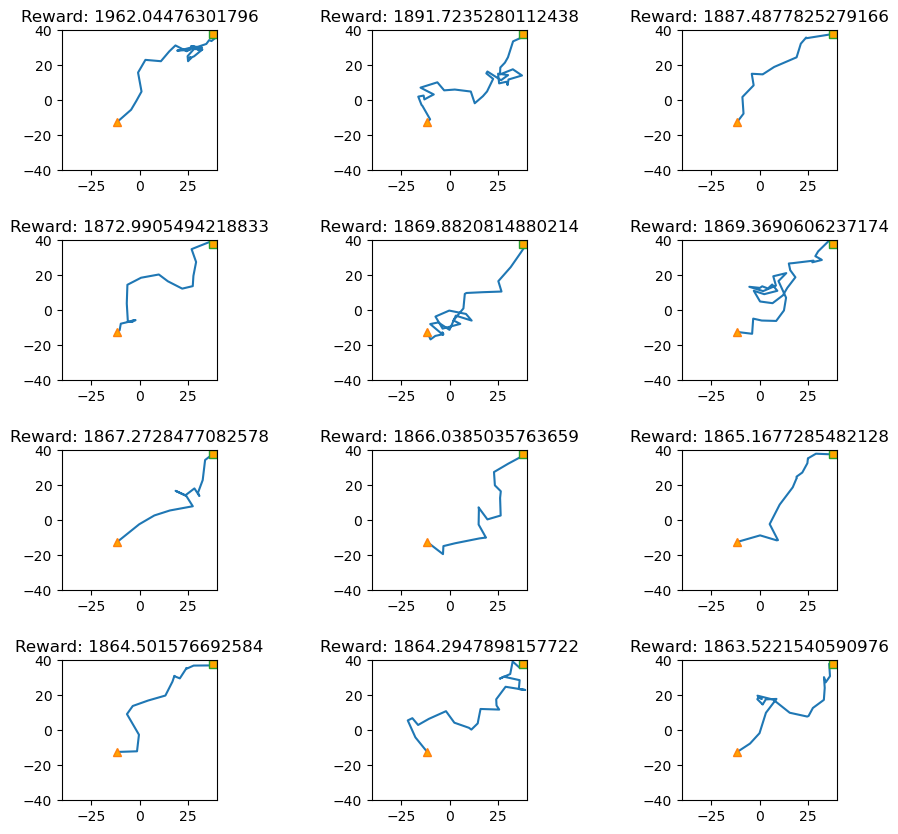

In [86]:
visualize_samples_2D(samples)